In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image 

In [7]:
train_dir = "C:\\Users\\hp\\Downloads\\6 Pneumonia_X_Ray\\chest_xray\\train"
val_dir = "C:\\Users\\hp\\Downloads\\6 Pneumonia_X_Ray\\chest_xray\\val"
test_dir = "C:\\Users\\hp\\Downloads\\6 Pneumonia_X_Ray\\chest_xray\\test"


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Random shear
    zoom_range=0.2,   # Random zoom
    horizontal_flip=True  # Randomly flip images
)

In [9]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,           # Process 32 images at a time
    class_mode='binary'      # Binary classification: pneumonia or normal
)

Found 1547 images belonging to 2 classes.


In [11]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 16 images belonging to 2 classes.


In [12]:
model = models.Sequential()

In [13]:
# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [15]:
# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [16]:
# Flatten the results to feed into a dense layer
model.add(layers.Flatten())

In [17]:
# Fully connected layer
model.add(layers.Dense(128, activation='relu'))

In [18]:
# Output layer (binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 484 images belonging to 2 classes.


In [21]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5272 - loss: 0.6935
Test accuracy: 0.5165289044380188


In [22]:
x_batch, y_batch = next(train_generator)

In [23]:
# Plotting the images in the batch
plt.figure(figsize=(10, 10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

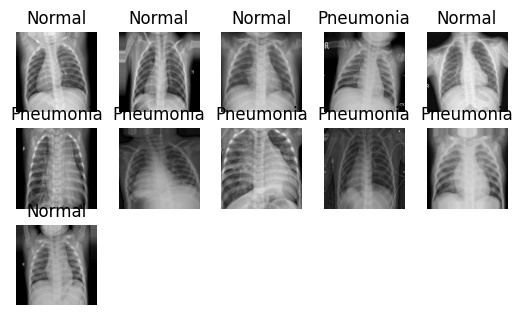

In [24]:
for i in range(11):  # Display 9 images
    plt.subplot(4,5 , i + 1)
    plt.imshow(x_batch[i])
    plt.title('Pneumonia' if y_batch[i] == 1 else 'Normal')
    plt.axis('off')

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 150, 150, 3)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=4,  # Set to a higher value for better results
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5405 - loss: 0.7783 - val_accuracy: 0.6875 - val_loss: 0.5473
Epoch 2/4
 1/48 ━━━━━━━━━━━━━━━━━━━━ 28s 603ms/step - accuracy: 0.7812 - loss: 0.4353

C:\Users\hp\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7812 - loss: 0.4353 - val_accuracy: 0.8125 - val_loss: 0.4447
Epoch 3/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8703 - loss: 0.3263 - val_accuracy: 0.8750 - val_loss: 0.3570
Epoch 4/4
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8750 - loss: 0.2796 - val_accuracy: 0.8750 - val_loss: 0.3575


In [28]:
 #Model evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")



16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 759ms/step - accuracy: 0.8352 - loss: 0.3331
Test accuracy: 0.8347107172012329


In [30]:
# Prediction on a single image
img_path = "C:\\Users\\hp\\Downloads\\6 Pneumonia_X_Ray\\chest_xray\\train\\PNEUMONIA\\person545_bacteria_2289.jpeg"

img_array = load_and_preprocess_image(img_path)

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Pneumonia affected")
else:
    print("Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Pneumonia affected
